In [1]:
import sys
sys.path.insert(0, '../')
from gw_tools.gw_plot import gw_plot
from gw_tools import data_prep
from gw_tools.gw_cnn import gw_cnn
from keras.callbacks import EarlyStopping
import datetime
import IPython
import IPython.display
from keras.losses import MeanSquaredError
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = data_prep.load_data('AEK201')
df = data_prep.select_features(df)
df = data_prep.add_toy_signal(df)
X_train, X_holdout, y_train, y_holdout, dt_train, dt_holdout = data_prep.prep_data_for_training(df)

In [3]:
scaler =  StandardScaler(copy=True)

## Make the model
gw_cnn = gw_cnn(C1_LAYER=True, C1_FILTERS=32, C1_KERNEL=16,
                    C2_LAYER=True, C2_FILTERS=128, C2_KERNEL=24,
                    C3_LAYER=True, C3_FILTERS=64, C3_KERNEL=36,
                    D_MAX_LAYERS = 8, D_TOP_UNITS = 150, D_MIN_UNITS=3,
                    D_UNIT_SCALE = 0.1,
                    LEARNING_RATE=0.001,
                    EPOCHS=100, BATCH_SIZE=32, STOP_DELTA=.1,
                    RANDOM_STATE = 90210)

pipe = Pipeline([('scaler', scaler), 
                     ('gw_cnn', gw_cnn)])

In [4]:
## Time series cross validation split
N_SPLITS = 5
tscv = TimeSeriesSplit(n_splits=N_SPLITS, test_size=365, gap=0)

## Scaler to normalize the feature values
scaler =  StandardScaler(copy=True)

## Pipeline to scale the data and fit the model
pipe = Pipeline([('scaler', scaler), 
                     ('gw_cnn', gw_cnn)])

## Cross validate
mses_cnn = np.zeros(N_SPLITS)
i = 0
for train, test in tscv.split(X_train, y_train):
    ## Split the data into train/test sets
    X_tt = X_train[train]
    y_tt = y_train[train]
    X_ho = X_train[test]
    y_ho = y_train[test]

    pipe.fit(X_tt,y_tt)

    ## Make predictions
    pred = pipe.predict(X_ho)

    ## Score the model
    mse = np.mean((pred-y_ho)**2)
    mses_cnn[i] = mse

    i += 1

2023-11-15 16:15:31.160941: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-11-15 16:15:31.160956: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2023-11-15 16:15:31.160961: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2023-11-15 16:15:31.160988: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-15 16:15:31.161000: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100
 1/67 [..............................] - ETA: 21s - loss: 4452.0952

2023-11-15 16:15:31.543183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 1s 6ms/step - loss: 728.2327
Epoch 2/100
67/67 [==============================] - 0s 5ms/step - loss: 124.6070
Epoch 3/100
67/67 [==============================] - 0s 5ms/step - loss: 36.4989
Epoch 4/100
67/67 [==============================] - 0s 5ms/step - loss: 13.2689
Epoch 5/100
67/67 [==============================] - 0s 5ms/step - loss: 6.3689
Epoch 6/100
67/67 [==============================] - 0s 5ms/step - loss: 3.5769
Epoch 7/100
67/67 [==============================] - 0s 5ms/step - loss: 2.6253
Epoch 8/100
67/67 [==============================] - 0s 5ms/step - loss: 1.5652
Epoch 9/100
67/67 [==============================] - 0s 5ms/step - loss: 1.1778
Epoch 10/100
67/67 [==============================] - 0s 5ms/step - loss: 1.4905
Epoch 11/100
67/67 [==============================] - 0s 5ms/step - loss: 0.8472
Epoch 12/100
67/67 [==============================] - 0s 5ms/step - loss: 0.8502
Epoch 13/100
67/67 [=======================

2023-11-15 16:15:37.488871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/78 [==>...........................] - ETA: 0s - loss: 3102.6499 

2023-11-15 16:15:37.732723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


78/78 [==============================] - 1s 6ms/step - loss: 603.9391
Epoch 2/100
78/78 [==============================] - 0s 5ms/step - loss: 60.8295
Epoch 3/100
78/78 [==============================] - 0s 5ms/step - loss: 18.2058
Epoch 4/100
78/78 [==============================] - 0s 5ms/step - loss: 6.0436
Epoch 5/100
78/78 [==============================] - 0s 5ms/step - loss: 3.0185
Epoch 6/100
78/78 [==============================] - 0s 5ms/step - loss: 2.1094
Epoch 7/100
78/78 [==============================] - 0s 5ms/step - loss: 1.6566
Epoch 8/100
78/78 [==============================] - 0s 5ms/step - loss: 1.3774
Epoch 9/100
78/78 [==============================] - 0s 5ms/step - loss: 1.4428
Epoch 10/100
78/78 [==============================] - 0s 5ms/step - loss: 1.0396
Epoch 11/100
78/78 [==============================] - 0s 5ms/step - loss: 0.7982
Epoch 12/100
78/78 [==============================] - 0s 5ms/step - loss: 0.9212
Epoch 13/100
78/78 [=========================

2023-11-15 16:15:45.908042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/90 [==>...........................] - ETA: 0s - loss: 2421.7192 

2023-11-15 16:15:46.133901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - 1s 6ms/step - loss: 567.1918
Epoch 2/100
90/90 [==============================] - 0s 5ms/step - loss: 76.6562
Epoch 3/100
90/90 [==============================] - 0s 5ms/step - loss: 14.2793
Epoch 4/100
90/90 [==============================] - 0s 5ms/step - loss: 5.5693
Epoch 5/100
90/90 [==============================] - 0s 5ms/step - loss: 3.6908
Epoch 6/100
90/90 [==============================] - 0s 5ms/step - loss: 2.2819
Epoch 7/100
90/90 [==============================] - 0s 5ms/step - loss: 2.6684
Epoch 8/100
90/90 [==============================] - 0s 5ms/step - loss: 1.3183
Epoch 9/100
90/90 [==============================] - 0s 5ms/step - loss: 1.2466
Epoch 10/100
90/90 [==============================] - 0s 5ms/step - loss: 0.9436
Epoch 11/100
90/90 [==============================] - 0s 5ms/step - loss: 1.3746
Epoch 12/100
90/90 [==============================] - 0s 5ms/step - loss: 0.9869
Epoch 13/100
90/90 [=========================

2023-11-15 16:15:54.710990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 10/101 [=>............................] - ETA: 0s - loss: 3843.9368 

2023-11-15 16:15:54.942756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 1s 6ms/step - loss: 701.5270
Epoch 2/100
101/101 [==============================] - 0s 5ms/step - loss: 83.0730
Epoch 3/100
101/101 [==============================] - 0s 5ms/step - loss: 15.9135
Epoch 4/100
101/101 [==============================] - 1s 5ms/step - loss: 4.9637
Epoch 5/100
101/101 [==============================] - 1s 5ms/step - loss: 2.2422
Epoch 6/100
101/101 [==============================] - 0s 5ms/step - loss: 1.3242
Epoch 7/100
101/101 [==============================] - 0s 5ms/step - loss: 1.0348
Epoch 8/100
101/101 [==============================] - 0s 5ms/step - loss: 1.1432
Epoch 9/100
101/101 [==============================] - 0s 5ms/step - loss: 0.7343
Epoch 10/100
101/101 [==============================] - 0s 5ms/step - loss: 1.1064
Epoch 11/100
101/101 [==============================] - 0s 5ms/step - loss: 0.7227
Epoch 12/100
101/101 [==============================] - 0s 5ms/step - loss: 0.7719
Epoch 13/100
12/12 [=

2023-11-15 16:16:01.437623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  9/112 [=>............................] - ETA: 0s - loss: 3427.7346 

2023-11-15 16:16:01.671520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


112/112 [==============================] - 1s 5ms/step - loss: 495.3405
Epoch 2/100
112/112 [==============================] - 1s 5ms/step - loss: 52.9622
Epoch 3/100
112/112 [==============================] - 1s 5ms/step - loss: 6.7020
Epoch 4/100
112/112 [==============================] - 1s 5ms/step - loss: 3.1626
Epoch 5/100
112/112 [==============================] - 1s 5ms/step - loss: 2.0165
Epoch 6/100
112/112 [==============================] - 1s 5ms/step - loss: 1.2027
Epoch 7/100
112/112 [==============================] - 1s 5ms/step - loss: 1.4214
Epoch 8/100
112/112 [==============================] - 1s 5ms/step - loss: 0.9053
Epoch 9/100
112/112 [==============================] - 1s 5ms/step - loss: 0.7884
Epoch 10/100
112/112 [==============================] - 1s 5ms/step - loss: 0.8319
Epoch 11/100
112/112 [==============================] - 1s 5ms/step - loss: 0.6680
Epoch 12/100
112/112 [==============================] - 1s 5ms/step - loss: 0.9747
Epoch 13/100
112/112 [

2023-11-15 16:16:10.875282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [5]:
score = pipe.score(X_holdout,y_holdout)
print(f'During cross validation, the average root mean squared error for this model was {np.sqrt(np.mean(mses_cnn))}')
print(f'On the holdout set, the root mean squared error for this model is {np.sqrt(-score)}.')

12/12 [==============================] - 0s 2ms/step
During cross validation, the average root mean squared error for this model was 4.389428577486684
On the holdout set, the root mean squared error for this model is 5.625684197642627.


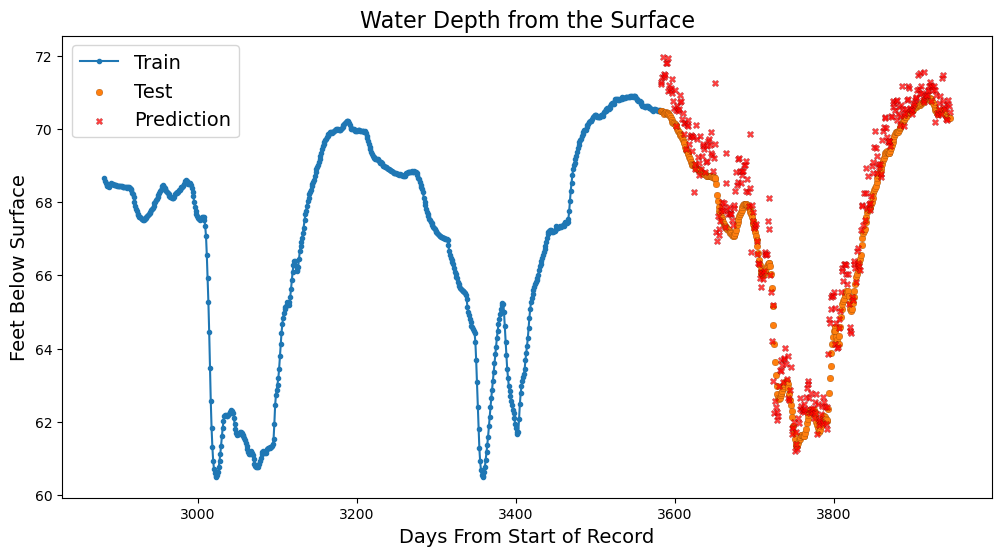

In [6]:
gw_plot(train=y_tt, test=y_ho, pred=pred, train_limit=700)